#  <span style="color:green"> <center> Example Notebook to the 'tree_lab' Package </center> </span>

## <span style="color:green"> Introduction </span>

Welcome to this Jupyter Notebook! This notebook is designed to provide easy and intuitive dataset analysis to the users with less of a need of extensive technical expertise. It will provide example codes to showcase how our package may be used in relation to the specific dataset that we will mention below.


## <span style="color:green"> Objectives </span>

This notebook will guide you through the usage of three core modules within our package:


- Data Cleaning
- Data Preprocessing
- Data Visualization

## <span style="color:green"> Background </span>

Only basic knowledge in python and data analysis is required in order to understand the concepts mentionned. That is it!

##  <span style="color:green"> About The Data </span>

<span style="color:red"> **Attention** </span>: The following information is provided by the authors of the experiment and not by us! If you use this dataset in your research, please credit the original authors.
https://doi.org/10.5061/dryad.xd2547dpw



We conducted a factorial blocked design field experiment, consisting of four tree species, seven soil sources (sterilized conspecific, live conspecific, and five heterospecific), and a gradient of forest understory light levels (low, medium, and high). We monitored seedling survival twice per week over one growing season, and we randomly selected subsets of seedlings to measure mycorrhizal colonization and phenolics, lignin, and NSC measurements at three weeks. We used Cox proportional hazards survival models to evaluate survival and linear mixed effects models to test how light availability and soil source influence traits.

Detailed information about each column follows:

- **No**: Seedling unique ID number.
- **Plot**: Number of the field plot the seedling was planted in (1-18).
- **Subplot**: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle) (A-E).
- **Species**: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.
- **Light ISF**: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m.
- **Light Cat**: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high).
- **Core**: Year the soil core was removed from the field.
- **Soil**: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.
- **Adult**: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses.
- **Sterile**: Whether the soil was sterilized or not.
- **Conspecific**: Whether the soil was conspecific, heterospecific, or sterilized conspecific.
- **Myco**: Mycorrhizal type of the seedling species (AMF or EMF).
- **SoilMyco**: Mycorrhizal type of the species culturing the soil (AMF or EMF).
- **PlantDate**: The date that seedlings were planted in the field pots.
- **AMF**: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.
- **EMF**: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
- **Phenolics**: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods).
- **NSC**: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods).
- **Lignin**: Calculated as percent dry mass lignin (see manuscript for detailed methods).
- **Census**: The census number at which time the seedling died or was harvested.
- **Time**: The number of days at which time the seedling died or was harvested.
- **Event**: Used for survival analysis to indicate status of each individual seedling at a given time (above) <br>
0 = harvested or experiment ended <br>
1 = dead <br>
- **Harvest**: Indicates whether the seedling was harvested for trait measurement.
- **Alive**: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.
- **Missing data is coded as NA.**

**Acknowledgements:**

All data was collected from single experiment and is presented in the associated manuscript: Wood, Katherine; Kobe, Richard; Ibáñez, Inés; McCarthy-Neumann, Sarah (2023). Tree seedling functional traits mediate plant-soil feedback survival responses across a gradient of light availability.


## <span style="color:green"> Let's Get Started! </span>

In [1]:
# We will begin by downloading our tree_lab package, along with the necessary packages to use for this example.

from tree_lab import preprocessing as prp,Visualization as vs, Cleaning as cln
import pandas as pd

In [2]:
# Dataframe reading by pandas
df = pd.read_csv("Tree_Data.csv")

## <span style="color:green"> Data Cleaning: A Fundamental Step </span>
In this Jupyter Notebook, we will commence our data analysis journey by focusing on the foundational process of data cleaning. 

In [3]:
# We will create an instance of our data and name it tree_cleaner.

tree_cleaner = cln.TreeDataCleaner(df)

The **detect_na** function will detect the columns with null values and print out the null values correspondingly.

In [4]:
# The columns with null values is given as an output.

tree_cleaner.detect_na()

Columns with null values:
['EMF', 'Event', 'Harvest', 'Alive']


The **impute_na()** function is used to impute missing values in the DataFrame.

In [5]:
# PS: This function have no output. By default it is either a mean imputation or constant imputation. You can
# refer to the documentation for more information.

tree_cleaner.impute_na()

This **modify_status()** function will modify the "NA" and "X" values in Alive column to 0 and 1 respectively where 0 indicates the plant is Dead and the 1 indicates the plant is alive. Also the function renames the Event column as Dead where 1 idicates the plant is dead and 0 indicates the plant is alive.

In [6]:
# The values in the Alive coulmn is now set to 0's and 1's and also the column Event is now set to Dead

tree_cleaner.modify_status().head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Dead,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,26.47675,-0.56,13.86,12.15,4,14.0,1.0,0,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07000,5.19,20.52,19.29,33,115.5,0.0,0,1
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19000,3.36,24.74,15.01,18,63.0,1.0,0,0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,26.47675,-0.71,14.29,12.36,4,14.0,1.0,0,0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,26.47675,-0.58,10.85,11.20,4,14.0,1.0,0,0


This **input_values()** function will remove the column that the user give in.

In [7]:
# The given column "Plot" is now removed permanently.

tree_cleaner.del_cols(['Plot'])

In [8]:
# We can see here that it no longer exists.

print(tree_cleaner.display().columns)

Index(['No', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil',
       'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate',
       'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Dead',
       'Harvest', 'Alive'],
      dtype='object')


## <span style="color:green"> Preprocessing for Further Development </span>

In this section, we'll merge the changes made previously and insert them into a preprocessing instance for further development.

In [9]:
# We will create an instance of our data from the previous cleaning and name it preprocess.

preprocess = prp.DataPreprocessor(tree_cleaner.display())

In [10]:
# We can type in a numerical column with a scaler type and the returned data will be normalized
# on the defined coloumns

preprocess.normalize_data(["Light_ISF"], scaler_type="minmax").loc[:,["Light_ISF"]]

,Light_ISF
0,0.573643
1,0.573643
2,0.573643
3,0.372093
4,0.217054
...,...
2778,0.612403
2779,0.666667
2780,0.666667
2781,1.000000


In [11]:
# We can also in put multiple columns to normalize, but if you input by mistake a non-numerical feature,
# or a feature with issues, a message will be outputted to warn that only numerical are allowed.

preprocess.normalize_data(["Lignin", "Soil"])

'Soil' is not a numeric column! It is either categorical or contains n/a values! Only numeric columns can be normalized!


In [12]:
# Once this is fixed, it will return the data normalized too. If you have noticed, in this case, the default 
# normalization will be a normal one according to the guassian distribution.

preprocess.normalize_data(["Lignin", "AMF"]).loc[:,["Lignin", "AMF"]].head()

,Lignin,AMF
0,-0.280272,0.117566
1,0.702262,-0.384572
2,1.324829,0.316634
3,-0.216835,0.136254
4,-0.724330,0.048502


In [13]:
# The display function will display the dataframe with all of its previous changes.

preprocess.display().head()

,No,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Dead,Harvest,Alive
0,126,C,Acer saccharum,0.573643,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,...,0.117566,26.47675,-0.56,-0.280272,12.15,4,14.0,1.0,0,0
1,11,C,Quercus alba,0.573643,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,...,-0.384572,31.07000,5.19,0.702262,19.29,33,115.5,0.0,0,1
2,12,C,Quercus rubra,0.573643,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,...,0.316634,28.19000,3.36,1.324829,15.01,18,63.0,1.0,0,0
3,2823,D,Acer saccharum,0.372093,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,...,0.136254,26.47675,-0.71,-0.216835,12.36,4,14.0,1.0,0,0
4,5679,A,Acer saccharum,0.217054,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,...,0.048502,26.47675,-0.58,-0.724330,11.20,4,14.0,1.0,0,0


## <span style="color:green">  Visualization at last! </span>
In this last part, we'll make into good use our previous cleaning and preprocessing in order to try and visualize our data.


In [14]:
# We insert our changes into a variable df_clean to further work with it.

df_clean = preprocess.display()

The **summarize()** function returns a table of frequencies of the preselected variables.

In [15]:
# Using the summarize function it is possible to get tables of frequencies or relative frequencies 
# of the variables. the tables of frequencies and relative frequencies are displayed for 
# the variables "Species" and "Subplot".

vs.summarize(df = df_clean, 
             col  = ['Species', 'Subplot'], 
             kind = "Frequency and Relative frequency", 
             dec = 2)


Summary for Species:

           Species  Frequency  Relative frequency
0   Acer saccharum        751               26.99
1  Prunus serotina        749               26.91
2     Quercus alba        673               24.18
3    Quercus rubra        610               21.92

Summary for Subplot:

  Subplot  Frequency  Relative frequency
0       A        701               25.19
1       D        666               23.93
2       B        663               23.82
3       C        646               23.21
4       E        107                3.84


We can also change the amount of decimals in the **summarize()** function like shown by contrast from the above table to the below table.

In [16]:
vs.summarize(df = df_clean, 
             col  = ['Dead'], 
             kind = "Relative frequency", 
             dec = 4)


Summary for Dead:

   Dead  Relative frequency
0   1.0             57.0248
1   0.0             42.9752


In [17]:
# It is possible to display the Frequencies without the relative frequencies.

vs.summarize(df = df_clean,
             col  = ['Dead'],
             kind = "Frequency")


Summary for Dead:

   Dead  Frequency
0   1.0       1587
1   0.0       1196


In [18]:
# it is possible to summarize also the numerical columns using the function compute_stats()

# It is possible to use it just with the columns: Ligth ISF, AMF, EMF, Phenolics, Lignin, NSC

vs.compute_stats(dataframe = df, selected_columns = ['Light_ISF', 'AMF'])

,Mean,Standard Deviation,Minimum,Maximum,Median
Light_ISF,0.085707,0.025638,0.032,0.161,0.082
AMF,20.553069,12.309587,0.000,100.000,18.000


In [19]:
# if the selected columns are not among the ones specified above, the function returns a message
vs.compute_stats(dataframe = df, selected_columns = ['Phenolics', 'EMF', 'Census'])

Error: 'Census' is not one of the specified columns.


In order to visualize the data, specifically the status of the plant compared to other variables, 
it is possible to use the function **bar_plot()**. The possibilities for the combination of variables are:

- "Species_vs_Status"
- "Species_vs_field"
- "Light level vs status"

You can refer to the documentation for more details.

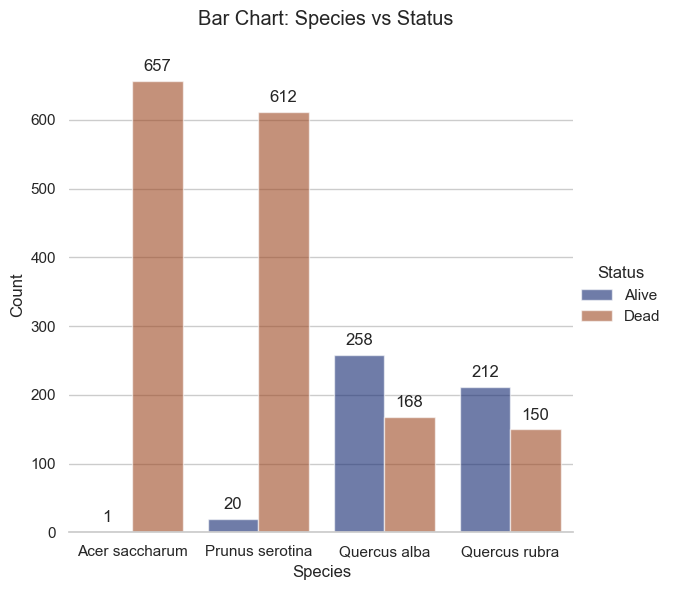

In [20]:
#

vs.bar_plot(df = df_clean, 
            kind = "Species_vs_Status")

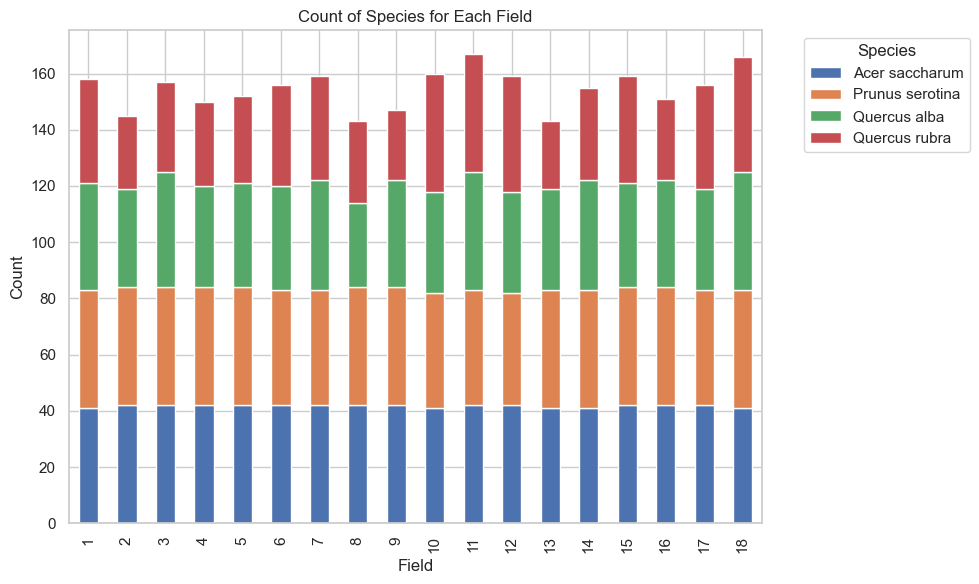

In [21]:
vs.bar_plot(df = df, kind = "Species_vs_field")

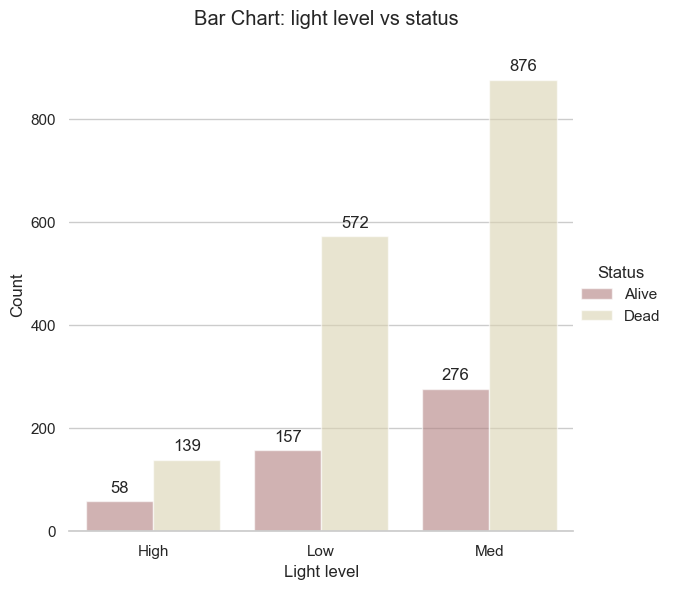

In [22]:
vs.bar_plot(df = df_clean, kind = "Light level vs status")

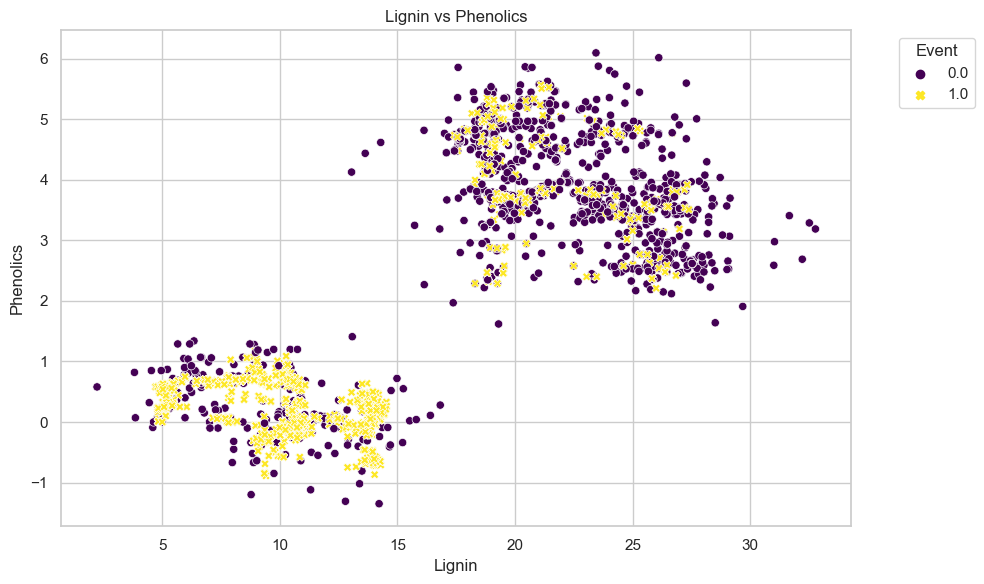

In [23]:
# The scatter_plot function will give out a scatter plot where it takes numerical X and Y-axis as one of the parameter, as well as the legend and the title.

vs.scatter_plot(df, "Lignin", "Phenolics", "Event", "Lignin vs Phenolics")